In [88]:
import os
import subprocess
from tqdm.notebook import tqdm

In [62]:
command = ['../../../../mnt/c/Users/User/Supercomputers/Lab1/cmake-build-debug/Lab1', '1000', '1000', '4']

## Замеры времени

In [74]:
# wihtout OpenMMP

none = [[],[]]
command = ['../../../../mnt/c/Users/User/Supercomputers/Lab1/cmake-build-debug/Lab1', '1000', '1000', '4']

for k, size in enumerate(['1000', '2000']):
    command[1] = size
    command[2] = size
    for i in range(5):
        process = subprocess.Popen(command, stdout=subprocess.PIPE)
        time, err = process.communicate()
        time = float(time.decode('utf-8').strip())
        none[k].append(time)

In [169]:
none = np.array(none)
none

array([[ 3.49761,  3.51581,  3.47472,  3.51898,  3.6439 ],
       [13.942  , 13.9432 , 14.2498 , 14.055  , 14.6576 ]])

In [91]:
# using parallel for

parallel_for = [[], []]
command = ['../../../../mnt/c/Users/User/Supercomputers/Lab1/cmake-build-debug/Lab1', '1000', '1000', '4']

for k, size in enumerate(['1000', '2000']):
    command[1] = size
    command[2] = size
    for i in tqdm([1, 2, 4, 8, 16]):
        temp = []
        for j in range(5):
            command[3] = str(i)
            process = subprocess.Popen(command, stdout=subprocess.PIPE)
            time, err = process.communicate()
            time = float(time.decode('utf-8').strip())
            temp.append(time)
        parallel_for[k].append(min(temp))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [170]:
parallel_for = np.array(parallel_for)
parallel_for

array([[ 3.33024,  1.8931 ,  1.81307,  1.61502,  1.62103],
       [13.6082 ,  8.62776,  7.38581,  7.00373,  6.25305]])

In [97]:
# using schedule static

schedule_static = [[], []]
command = ['../../../../mnt/c/Users/User/Supercomputers/Lab1/cmake-build-debug/Lab1', '1000', '1000', '4']

for k, size in enumerate(['1000', '2000']):
    command[1] = size
    command[2] = size
    for i in tqdm([1, 2, 4, 8, 16]):
        temp = []
        command[3] = str(i)
        for j in range(5):
            process = subprocess.Popen(command, stdout=subprocess.PIPE)
            time, err = process.communicate()
            time = float(time.decode('utf-8').strip())
            temp.append(time)
        schedule_static[k].append(min(temp))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [171]:
schedule_static = np.array(schedule_static)
schedule_static

array([[ 3.35639,  1.83147,  1.34147,  1.54248,  1.45113],
       [13.4797 ,  8.58808,  5.74522,  5.77119,  6.06083]])

In [99]:
# using schedule dynamic

schedule_dynamic = [[], []]
command = ['../../../../mnt/c/Users/User/Supercomputers/Lab1/cmake-build-debug/Lab1', '1000', '1000', '4']

for k, size in enumerate(['1000', '2000']):
    command[1] = size
    command[2] = size
    for i in tqdm([1, 2, 4, 8, 16]):
        temp = []
        for j in range(5):
            command[3] = str(i)
            process = subprocess.Popen(command, stdout=subprocess.PIPE)
            time, err = process.communicate()
            time = float(time.decode('utf-8').strip())
            temp.append(time)
        schedule_dynamic[k].append(min(temp))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [172]:
schedule_dynamic = np.array(schedule_dynamic)
schedule_dynamic

array([[ 3.33833,  1.92181,  1.42349,  1.44237,  1.45664],
       [13.403  ,  8.50623,  5.70428,  5.64225,  5.766  ]])

In [102]:
# using schedule guided

schedule_guided = [[], []]
command = ['../../../../mnt/c/Users/User/Supercomputers/Lab1/cmake-build-debug/Lab1', '1000', '1000', '4']

for k, size in enumerate(['1000', '2000']):
    command[1] = size
    command[2] = size
    for i in tqdm([1, 2, 4, 8, 16]):
        temp = []
        for j in range(5):
            command[3] = str(i)
            process = subprocess.Popen(command, stdout=subprocess.PIPE)
            time, err = process.communicate()
            time = float(time.decode('utf-8').strip())
            temp.append(time)
        schedule_guided[k].append(min(temp))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [173]:
schedule_guided = np.array(schedule_guided)
schedule_guided

array([[ 3.36163,  2.11054,  1.95434,  1.49472,  1.41025],
       [13.4864 ,  8.5867 ,  7.67935,  6.28982,  5.75514]])

In [111]:
# using collapse

collapse = [[], []]
command = ['../../../../mnt/c/Users/User/Supercomputers/Lab1/cmake-build-debug/Lab1', '1000', '1000', '4']

for k, size in enumerate(['1000', '2000']):
    command[1] = size
    command[2] = size
    for i in tqdm([1, 2, 4, 8, 16]):
        command[3] = str(i)
        process = subprocess.Popen(command, stdout=subprocess.PIPE)
        time, err = process.communicate()
        time = float(time.decode('utf-8').strip())
        collapse[k].append(time)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [112]:
collapse

[[3.46607, 3.79004, 5.43629, 11.5452, 23.0494],
 [13.8674, 17.062, 23.1813, 45.4863, 90.7361]]

## Статистика

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
none_ = [[min(none[0]), 0, 0, 0, 0],[min(none[1]), 0, 0, 0, 0]]

In [153]:
statistic = pd.DataFrame(data=[none_[0], none_[1], parallel_for[0], parallel_for[1], schedule_static[0], schedule_static[1],
                              schedule_dynamic[0], schedule_dynamic[1], schedule_guided[0], schedule_guided[1]], 
                         index=['none 1000', 'none 2000', 'parallel for 1000', 'parallel for 2000', 'schedule static 1000',
                               'schedule static 2000', 'schedule dynamic 1000', 'schedule dynamic 2000',
                               'schedule guided 1000', 'schedule guided 2000'], 
                         columns=['1', '2', '4', '8', '16'])

In [154]:
statistic

,1,2,4,8,16
none 1000,3.47472,0.00000,0.00000,0.00000,0.00000
none 2000,13.94200,0.00000,0.00000,0.00000,0.00000
parallel for 1000,3.33024,1.89310,1.81307,1.61502,1.62103
parallel for 2000,13.60820,8.62776,7.38581,7.00373,6.25305
schedule static 1000,3.35639,1.83147,1.34147,1.54248,1.45113
schedule static 2000,13.47970,8.58808,5.74522,5.77119,6.06083
schedule dynamic 1000,3.33833,1.92181,1.42349,1.44237,1.45664
schedule dynamic 2000,13.40300,8.50623,5.70428,5.64225,5.76600
schedule guided 1000,3.36163,2.11054,1.95434,1.49472,1.41025
schedule guided 2000,13.48640,8.58670,7.67935,6.28982,5.75514


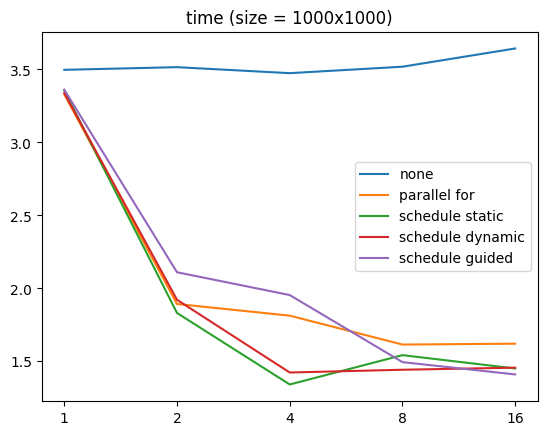

In [167]:
x = ['1', '2', '4', '8', '16']
plt.title('time (size = 1000x1000)')
plt.plot(x, none[0], label='none')
plt.plot(x, parallel_for[0], label='parallel for')
plt.plot(x, schedule_static[0], label='schedule static')
plt.plot(x, schedule_dynamic[0], label='schedule dynamic')
plt.plot(x, schedule_guided[0], label='schedule guided')
plt.legend()
plt.show()

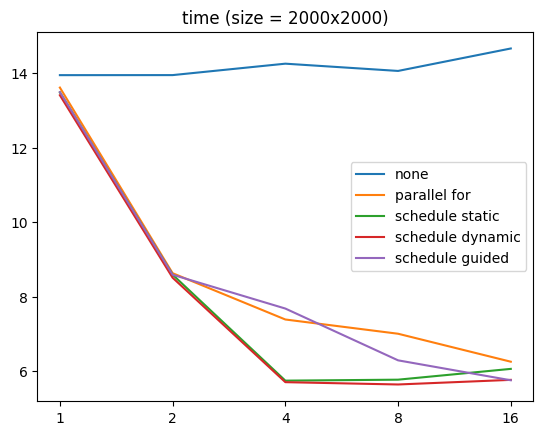

In [168]:
plt.title('time (size = 2000x2000)')
plt.plot(x, none[1], label='none')
plt.plot(x, parallel_for[1], label='parallel for')
plt.plot(x, schedule_static[1], label='schedule static')
plt.plot(x, schedule_dynamic[1], label='schedule dynamic')
plt.plot(x, schedule_guided[1], label='schedule guided')
plt.legend()
plt.show()

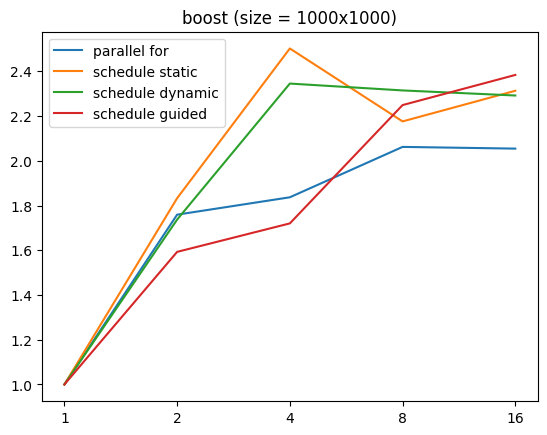

In [178]:
x = ['1', '2', '4', '8', '16']
plt.title('boost (size = 1000x1000)')
plt.plot(x, parallel_for[0,0]/parallel_for[0], label='parallel for')
plt.plot(x, schedule_static[0,0]/schedule_static[0], label='schedule static')
plt.plot(x, schedule_dynamic[0,0]/schedule_dynamic[0], label='schedule dynamic')
plt.plot(x, schedule_guided[0,0]/schedule_guided[0], label='schedule guided')
plt.legend()
plt.show()

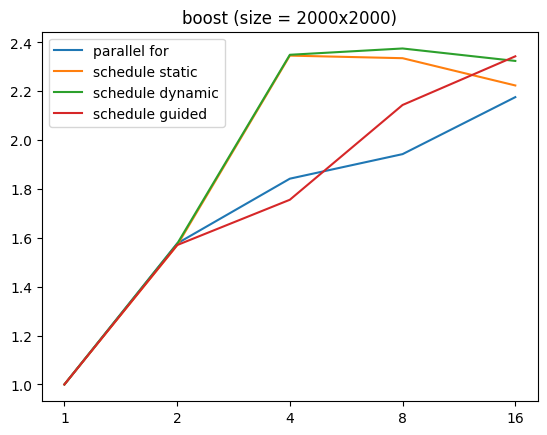

In [179]:
x = ['1', '2', '4', '8', '16']
plt.title('boost (size = 2000x2000)')
plt.plot(x, parallel_for[1,0]/parallel_for[1], label='parallel for')
plt.plot(x, schedule_static[1,0]/schedule_static[1], label='schedule static')
plt.plot(x, schedule_dynamic[1,0]/schedule_dynamic[1], label='schedule dynamic')
plt.plot(x, schedule_guided[1,0]/schedule_guided[1], label='schedule guided')
plt.legend()
plt.show()

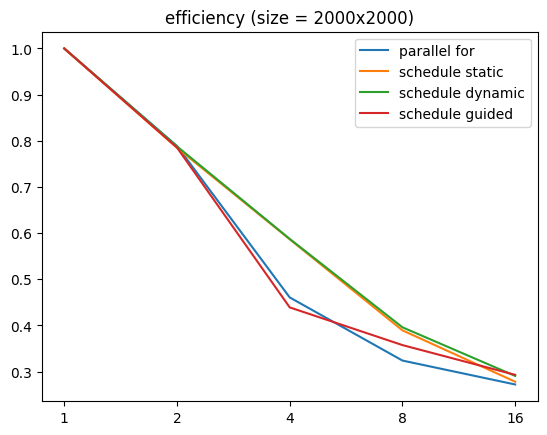

In [180]:
x = ['1', '2', '4', '8', '16']
p = [1, 2, 4, 6, 8]
plt.title('efficiency (size = 2000x2000)')
plt.plot(x, parallel_for[1,0]/parallel_for[1]/p, label='parallel for')
plt.plot(x, schedule_static[1,0]/schedule_static[1]/p, label='schedule static')
plt.plot(x, schedule_dynamic[1,0]/schedule_dynamic[1]/p, label='schedule dynamic')
plt.plot(x, schedule_guided[1,0]/schedule_guided[1]/p, label='schedule guided')
plt.legend()
plt.show()

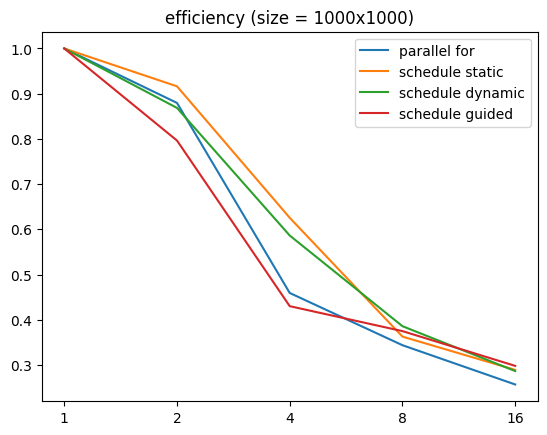

In [182]:
x = ['1', '2', '4', '8', '16']
p = [1, 2, 4, 6, 8]
plt.title('efficiency (size = 1000x1000)')
plt.plot(x, parallel_for[0,0]/parallel_for[0]/p, label='parallel for')
plt.plot(x, schedule_static[0,0]/schedule_static[0]/p, label='schedule static')
plt.plot(x, schedule_dynamic[0,0]/schedule_dynamic[0]/p, label='schedule dynamic')
plt.plot(x, schedule_guided[0,0]/schedule_guided[0]/p, label='schedule guided')
plt.legend()
plt.show()